<a href="https://colab.research.google.com/github/memoud0/pendulum-project/blob/main/pendulum_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction to Computer Programming in Engineering and Science Project 1: Optimization and ODEs

## Mohamed Mahmoud, Loïc Kafui Souka, Gabriel Mourao Aquize







Introduction to Computer Programming in Engineering and Science
Project 1: Optimization and ODEs

**Introduction:**

  In this project, the Verlet method will be used to analyse the motion of a pendulum (without air resistance) both with and without the small-angle approximation. In this project, we will build code to examine the relationship between the pendulum's amplitude and its angular frequency, and it will demonstrate how the small-angle approximation radically changes this relationship. Small-angle approximations are often used in pendulum motions to simplify calculations using the following approximation when θ<15 degrees: sin(θ) ≈ θ . In this project we will be using the approximation above for realistic results. Verlet integration is a numerical method used to integrate Newton's equations of motions. It helps to predict the trajectories of particles in dynamics. It is similar to Euler method except that it can be applied and more to second-order differential equation of the type ẍ = A(x). The Verlet algorithm uses positions, velocity and accelerations at time t to calculate the same values for time t+DT where DT is a timestep.

**Method:**

 In the first part of the code we plot theta vs time using the small angle approximation. We start by defining the constant and initial values that will be used throughout the code. We use two loops for each method (Euler and Verlet). We then plot both these methods into one single graph to compare them directly. In the second part we plot the same graph except that we ran two simulations of the Verlet, one using the small angle approximation and the other without it. We also plot it in the same graph to compare them. To do the Verlet method without the small angle approximation, we added sin to 0 from the previous equations. The graph theta vs time starts at its maximum value, using the amplitude of the function we can obtain the period using the time it takes theta to reach 0 which gives us one fourth of a period.

Finally, we run different iterations of the initial theta to plot the period vs the initial angle for both methods (with and without the angle approximation). It allows us to compare how the period would differ for both cases.

**Testing:**

  The angular velocity (ω) can be calculated theoretically using  the formula ω=√(g/l). As for the experimental angular velocity we calculate it with ω=2π/T using the period we had previously found. The theoretical value should be close to the value we got from the small angle approximation but different from the realistic value. Using both angular velocities, we can compare them and verify our code.

**Results:**

  It is evident from our initial graph that the Euler algorithm deviates from the simple pendulum model. Contrary to Euler, the Verlet algorithm method seems to adhere without any apparent deviation to the basic pendulum model. The breakdown of the small angle approximation when the pendulum's beginning angle is big is shown in our second graph. As soon as the two functions begin to operate independently, the realistic model appears to be moving more slowly than the model using the approximation. The period remains constant for all angles while using the small angle approximation, but it fluctuates significantly depending on the angle when using the realistic model, as seen in our last graph.

**Discussion:**

  Although the algorithm determined by implementing Euler’s method, as time goes on, furthers itself more and more from the actual value, this could have been predicted given the simple fact that not unbeknownst to us that Euler’s method tends towards inaccuracy when the 2nd derivative is used. Verlet’s method , however, as we can see on the graph, is much more suited to the use of 2nd derivatives which explains why it so meticulously describes the behavior of  a pendulum even as time increases.

The second diagram clearly expresses how, even though the small angle approximation holds true for lesser angles, its predictions slowly deviate from the theoretically correct values, ultimately, becoming obsolete for more substantial angles. Here for the angle 1.5 rad, even from the beginning we can see that the approximation deviates from the actual result, eventually being half a phase ahead of it after merely a few seconds. Which can be explain by the fact that the formula describing the SAA model relies on a constant angle (alpha) where the other one is affected by a function sin of the angle. Progressively shortening the length of the period with time.
**Conclusion:**

  In the end, we were mainly able to prove that the Verlet method is superior when it comes to second order differential equations compared to the Euler method. We were also able to determine how the period and amplitude change depending on the initial angles but also with and without using the small angle approximation. However, certain influences like the resistance of the air or the mass of the string are not taken into account in our calculations making it less “realistic”. Therefore, this model could be pushed further if we include such variables in our calculations.


# Euler and Verlet method with small angle approximation

Text(0.5, 1.0, 'The Angle vs. Time')

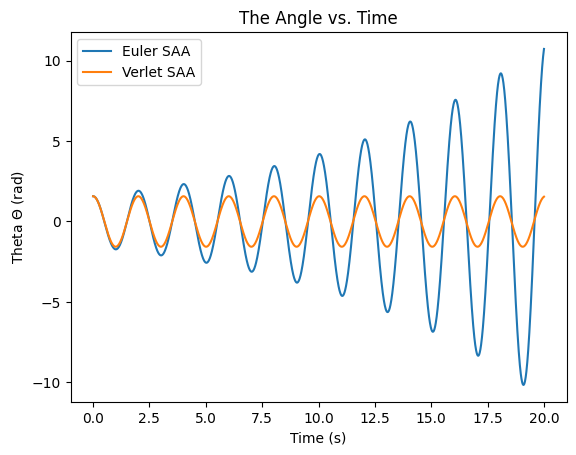

In [ ]:
# Import useful libraries
import math
import matplotlib.pyplot as plt

# Constants
DT = 0.01
T_MAX = 20.0
STEPS = int(T_MAX/DT)
g=9.81
l = 1.0

# Initial Conditions of the Pendulum
theta0 = 1.57
omega0 = 0
alpha0 = -(g/l)*theta0

# Setup where first element is initial condition
t = [0]
theta = [theta0]
omega = [omega0]
alpha = [alpha0]

# Loop (Euler's Method)
for i in range(STEPS):
  t.append(t[i]+DT)
  theta.append(theta[i]+omega[i]*DT)
  omega.append(omega[i]+alpha[i]*DT)
  alpha.append(-(g/l)*theta[i])

# Plot a scatter plot of t vs theta using Euler's method
plt.plot (t, theta, label='Euler SAA')

# Reset values to initial condition for Verlet method
t = [0]
theta = [theta0]
omega = [omega0]
alpha = [alpha0]

# Loop (Verlet method)
for i in range(STEPS):
  t.append(t[i]+DT)
  theta.append(theta[i]+omega[i]*DT+(alpha[i]*DT**2)/2)
  alpha.append(-(g/l)*theta[i+1])
  omega.append(omega[i]+(alpha[i]+alpha[i+1])/2*DT)

# Plot t vs theta using Verlet method
plt.plot(t, theta, label='Verlet SAA')
plt.legend()
plt.ylabel('Theta $\Theta $ (rad)')
plt.xlabel('Time (s)')
plt.title('The Angle vs. Time')

SAA Verlet method and Realistic Verlet method

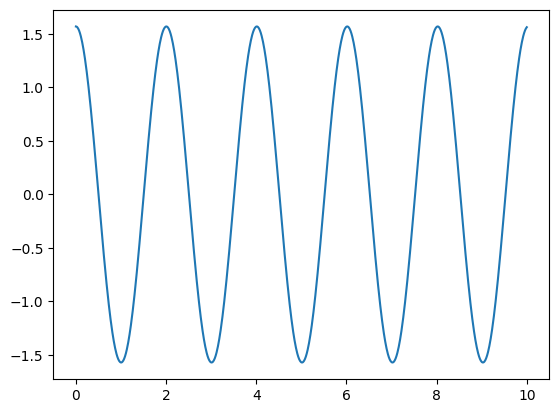

In [ ]:
# Import useful libraries
import math
import matplotlib.pyplot as plt

# Constants
DT = 0.01
T_MAX = 10.0
STEPS = int(T_MAX/DT)
g=9.81
l = 1.0

# Initial conditions
theta0 = 1.57
omega0 = 0
alpha0 = -(g/l)*theta0

#Verlet SAA
def verlet_SAA(theta0, omega0, alpha0):
  t = [0]
  alpha = [alpha0]
  omega = [omega0]
  theta = [theta0]


  for i in range(STEPS):
    t.append(t[i]+DT)
    theta.append(theta[i]+omega[i]*DT+(alpha[i]*DT**2)/2)
    alpha.append(-g*theta[i+1]/l)
    omega.append(omega[i]+(alpha[i]+alpha[i+1])/2*DT)

  return t, theta


t, theta = verlet_SAA (theta0, omega0, alpha0)

plt.plot(t, theta)

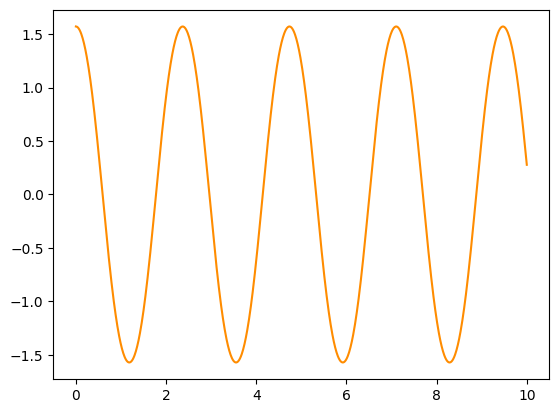

In [ ]:
# Import useful libraries
import math
import matplotlib.pyplot as plt


# Constants
DT = 0.01
T_MAX = 10.0
STEPS = int(T_MAX/DT)
g=9.81
l = 1.0


# Initial conditions
theta0 = 1.5708 # in radians (90 degrees)
omega0 = 0
alpha0 = -(g/l) * math.sin(theta0)

# Verlet realistic
def verlet_real(theta0, omega0, alpha0):
  t = [0]
  alpha= [alpha0]
  omega = [omega0]
  theta = [theta0]


  for i in range(STEPS):
    t.append(t_real[i]+DT)
    theta.append(theta[i]+omega[i]*DT+(alpha[i]*DT**2)/2)
    alpha.append(-g*math.sin(theta[i+1])/l)
    omega.append(omega[i]+(alpha[i]+alpha[i+1])/2*DT)

  return t, theta


t, theta = verlet_real (theta0, omega0, alpha0)

plt.plot(t, theta, color = 'darkorange')

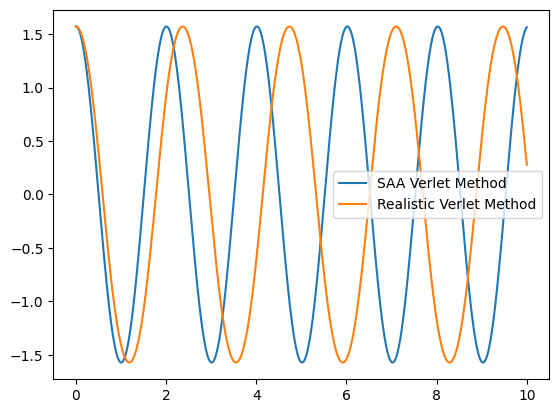

In [ ]:

t_SAA, theta_SAA = verlet_SAA (1.5708, omega0, alpha0)
t_real, theta_real = verlet_real (1.5708, omega0, alpha0)


plt.plot(t_SAA, theta_SAA, label = "SAA Verlet Method")
plt.plot(t_real, theta_real, label = "Realistic Verlet Method")

plt.legend()


# Period Calculation (Realistic and Small Angle)

In [ ]:
#period loop

def period_guide(theta_method):
  for i in range(len(theta_method)):
    if theta_method[i]<=0:
      guide = 4*i
      return guide
      break


#for SAA
guide_SAA = period_guide(theta_SAA)
period_SAA = t_SAA[guide_SAA]
print(f"the period for verlet SAA is {period_SAA:.3f}")

#realstic
guide_real = period_guide(theta_real)
period_real = t_real[guide_real]
print(f"the period for realistic verlet is {period_real:.3f}")

the period for verlet SAA is 2.040
the period for realistic verlet is 2.400


# Period for different thetas

In [ ]:
import numpy as np

theta_list = np.linspace(0.0174533, 3.14159265359, 180)

def finding_period_angle_range(method_function, period_guide):

  # print(theta_list)

  period_different_angles = []

  for i in range(len(theta_list)):

    t, theta = method_function(theta_list[i], omega0, alpha0)

    indexes = period_guide(theta)

    if indexes > len(t):
      break

    period_different_angles.append(t[indexes])

  return period_different_angles

#SAA

SAA_periods = finding_period_angle_range(verlet_SAA, period_guide)

# plt.plot(theta_list, SAA_periods, label = "SAA Verlet Method")
# plt.legend()

#realistic

realistic_periods = finding_period_angle_range(verlet_real, period_guide)

# plt.plot(theta_list[0:len(realistic_periods)], realistic_periods, label = "Realistic Verlet Method")
# plt.legend()


Text(0, 0.5, 'period (s)')

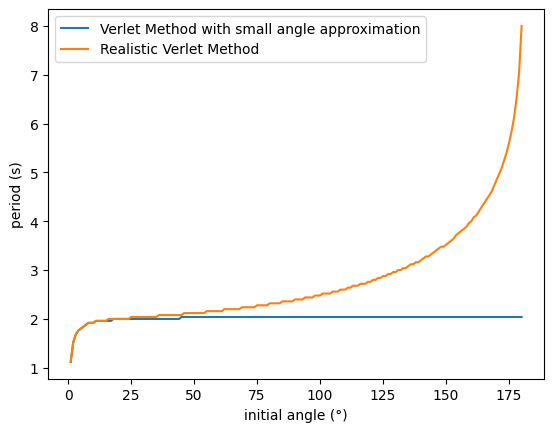

In [ ]:
theta_list_degrees = []

for theta in theta_list:
  theta_list_degrees.append(math.degrees(theta))

plt.plot(theta_list_degrees, SAA_periods, label = "Verlet Method with small angle approximation")
plt.plot(theta_list_degrees[0:len(realistic_periods)], realistic_periods, label = "Realistic Verlet Method")
  # We sliced the list because the lists had different lengths

plt.legend()
plt.xlabel("initial angle (°)")
plt.ylabel("period (s)")

# Frequency with respect to initial angle

the frequency for verlet SAA is [0.8928571428571422, 0.6578947368421048, 0.5952380952380948, 0.5681818181818178, 0.5555555555555551, 0.5434782608695649, 0.5319148936170208, 0.5208333333333329, 0.5208333333333329, 0.5208333333333329, 0.5102040816326526, 0.5102040816326526, 0.5102040816326526, 0.5102040816326526, 0.5102040816326526, 0.5102040816326526, 0.5102040816326526, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.49999999999999967, 0.4901960784313724, 0.4901960784313724, 0.4901960784313724, 

Text(0, 0.5, 'frequency (Hz)')

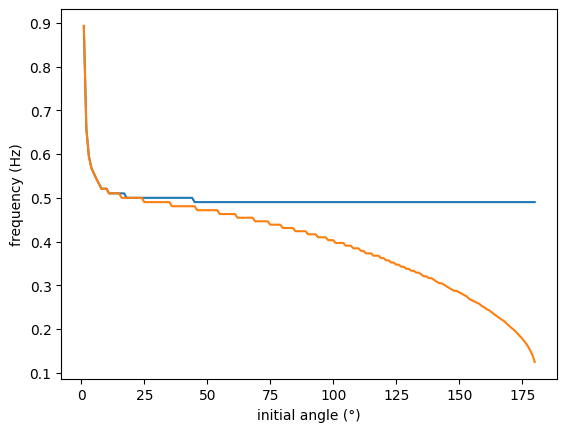

In [ ]:
#convert period to frequency

def frequency(period_list):
  frequencies = []
  for period in period_list:
    frequencies.append(1/period)
  return frequencies

#for SAA
frequency_SAA = frequency(SAA_periods)
print(f"the frequency for verlet SAA is {frequency_SAA}")

#realistic
frequency_real = frequency(realistic_periods)
print(f"the frequency for realistic verlet is {frequency_real}")

#plot graph
plt.plot(theta_list_degrees, frequency_SAA, label = "Verlet Method with small angle approximation")
plt.plot(theta_list_degrees[0 : len(frequency_real)], frequency_real, label = "Realistic Verlet Method")
plt.xlabel("initial angle (°)")
plt.ylabel("frequency (Hz)")